 # Multivariate linear regression

# Introduction

In the following study, we will fit a multivariate linear regression model using different feature selection techniques on the provided dataset to predict a given target variable (Mean per capita (100,000) cancer mortalities) as closely as possible.

During the next experiment, a feature importance selection and a Pearson's correlation feature selection are conducted to address the following objectives:

Reduces Overfitting: Having fewer repetitive data entries lowers the risk of making predictions based on aleatory variations, reducing overfitting.

Improves Accuracy: The modelling accuracy improves by having fewer erroneous data points, leading to higher precision.

Accelerates Training Time: With less data to process, algorithms can train faster, resulting in less training time.



## used libraries 

In [1]:
#working with data
import pandas as pd
import numpy as np


#plotting data
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading Data from a CSV File

In [3]:
df_test = pd.read_csv('cancer_us_county-testing.csv')

In [4]:
df_test

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,449.000000,154,159.5,479.800000,51880,104926,18.7,57.183158,"(51046.4, 54545.6]",30.2,...,51.0,24.9,13.1,81.260411,4.154831,10.045737,0.876222,41.071243,4.367123,2553
1,340.000000,140,167.2,438.500000,55472,55423,12.4,0.000000,"(54545.6, 61494.5]",46.9,...,37.6,36.3,16.0,93.660078,0.818115,0.626281,3.116360,57.529142,6.844366,904
2,54.000000,18,131.6,410.800000,49380,10103,11.7,0.000000,"(48021.6, 51046.4]",49.4,...,32.6,40.3,19.4,98.292181,0.041152,0.164609,0.051440,55.928482,1.604585,2192
3,94.000000,46,189.4,403.800000,45979,16708,13.5,598.515681,"(45201, 48021.6]",43.9,...,45.1,33.1,13.3,96.090377,1.555569,0.715680,0.378541,48.409405,8.255410,1326
4,2718.000000,1065,168.9,432.100000,51527,726106,20.7,60.597213,"(51046.4, 54545.6]",33.5,...,41.7,37.7,25.8,57.002148,7.093743,14.785464,11.692122,51.852122,6.148433,2394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,27.000000,14,187.6,415.700000,50155,4769,12.0,0.000000,"(48021.6, 51046.4]",42.6,...,42.0,27.4,12.1,85.768985,0.616890,0.042544,2.105935,51.104816,6.659013,2247
605,30.000000,9,131.6,444.600000,46961,4854,14.0,0.000000,"(45201, 48021.6]",41.3,...,40.7,30.9,15.8,96.122281,0.800164,0.307755,1.292573,49.671883,5.760870,2947
606,583.000000,258,187.5,429.400000,39907,127780,22.1,62.607607,"(37413.8, 40362.7]",36.9,...,39.8,37.9,22.7,81.407683,6.285701,4.388991,2.247924,47.875108,6.387886,1746
607,1962.667684,31,174.2,453.549422,50905,14219,9.3,0.000000,"(48021.6, 51046.4]",39.1,...,52.1,33.9,17.6,93.756201,1.658398,0.836286,0.290574,45.219595,5.893846,1822


In [5]:
df_train = pd.read_csv('cancer_us_county-training.csv')

In [6]:
df_train

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,389.000000,157,185.3,456.600000,65485,83199,7.7,0.000000,"(61494.5, 125635]",40.1,...,55.1,24.2,11.3,91.187608,4.445537,1.405213,0.858126,60.095060,5.175689,3041
2434,286.000000,117,196.7,492.400000,42477,46222,16.9,281.251352,"(40362.7, 42724.4]",40.8,...,46.2,34.9,18.8,90.130702,5.943936,0.472935,0.485833,51.648588,4.651829,3042
2435,103.000000,42,204.1,506.700000,40339,18201,21.3,0.000000,"(37413.8, 40362.7]",38.6,...,34.4,36.9,20.6,65.463178,30.550955,0.645909,0.104891,49.758980,4.344104,3043
2436,1962.667684,23,171.1,453.549422,39764,8856,16.7,0.000000,"(37413.8, 40362.7]",43.8,...,37.3,40.0,21.3,94.625317,0.154508,0.629070,0.684251,49.880605,6.210826,3045


## Case of study and data understanding 

Hypothesis

Analysing the 34 features given to predict the death rate, The case of study has the following hypothesis: 

The full dataset presents a high correlation between group of variables. We need to omit correlated variables and select one of them for the training phase to achieve a better accuracy in the model. 

## Explore the dataset

In [7]:
df_train.describe().round(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,...,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00,2438.00
mean,587.17,180.59,178.85,448.31,47028.43,98515.79,16.85,166.02,45.31,39.64,...,41.24,36.28,19.23,83.78,9.04,1.23,1.95,51.22,5.63,1523.79
std,1236.45,438.47,27.54,53.25,11919.39,274527.19,6.39,563.81,45.05,5.22,...,9.37,7.82,6.09,16.28,14.36,2.56,3.54,6.50,1.97,874.91
min,6.00,3.00,66.30,201.30,22640.00,827.00,3.20,0.00,22.30,22.40,...,13.50,11.20,2.60,10.20,0.00,0.00,0.00,22.99,0.00,0.00
25%,76.00,28.00,161.40,420.30,38872.75,11545.75,12.10,0.00,37.80,36.40,...,34.60,30.92,15.00,77.34,0.63,0.25,0.29,47.83,4.52,775.25
50%,172.50,62.00,178.10,453.55,45186.50,26942.50,15.90,0.00,41.00,39.60,...,41.30,36.40,18.80,90.12,2.30,0.55,0.80,51.66,5.37,1512.50
75%,521.50,151.00,195.30,481.98,52492.50,69524.50,20.40,92.56,44.08,42.50,...,47.60,41.50,23.10,95.46,10.45,1.21,2.11,55.33,6.46,2279.75
max,24965.00,9445.00,293.90,1014.20,125635.00,5238216.00,47.40,9762.31,624.00,64.70,...,70.70,65.10,46.60,100.00,84.87,42.62,41.93,78.08,18.56,3046.00


In [8]:
#Print general information about a DataFrame 
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   TARGET_deathRate         2438 non-null   float64
 3   incidenceRate            2438 non-null   float64
 4   medIncome                2438 non-null   int64  
 5   popEst2015               2438 non-null   int64  
 6   povertyPercent           2438 non-null   float64
 7   studyPerCap              2438 non-null   float64
 8   binnedInc                2438 non-null   object 
 9   MedianAge                2438 non-null   float64
 10  MedianAgeMale            2438 non-null   float64
 11  MedianAgeFemale          2438 non-null   float64
 12  Geography                2438 non-null   object 
 13  AvgHouseholdSize         2438 non-null   float64
 14  PercentMarried          

The dataset's information shows the features, data type, and Null count.
PctSomeCol18_24 and PctPrivateCoverageAlone, and PctEmployed16_Over have missing values.
These columns are not a good option for training the model because we can miss data when dropping rows with no value related to these columns.

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              609 non-null    float64
 1   avgDeathsPerYear         609 non-null    int64  
 2   TARGET_deathRate         609 non-null    float64
 3   incidenceRate            609 non-null    float64
 4   medIncome                609 non-null    int64  
 5   popEst2015               609 non-null    int64  
 6   povertyPercent           609 non-null    float64
 7   studyPerCap              609 non-null    float64
 8   binnedInc                609 non-null    object 
 9   MedianAge                609 non-null    float64
 10  MedianAgeMale            609 non-null    float64
 11  MedianAgeFemale          609 non-null    float64
 12  Geography                609 non-null    object 
 13  AvgHouseholdSize         609 non-null    float64
 14  PercentMarried           6

The test dataset, also presents null values on the same columns. 

## Data cleaning

1. Outliers

After analysing the distribution of the variables, some extreme values were discovered. Since we don't have extra information to confirm if we encounter errors in the data, and considering that changing the value for the mean or other aggregation could lead to wrong learning patterns from the model, the decision is to drop the rows with outliers on the variable that is going to predict the target (death rate).
Additionally, the amount of data we will lose doesn't represent a high proportion of the data.

In [10]:
df_train[df_train["incidenceRate"] > 700]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
851,135.0,23,162.1,1014.2,46954,15052,20.1,0.0,"(45201, 48021.6]",24.6,...,52.2,22.0,8.9,74.888166,15.277213,5.889928,0.460892,36.337594,2.181467,1083


In [11]:
 df_train = df_train.drop(df_train[df_train.incidenceRate > 700].index)

In [12]:
df_train[df_train["avgAnnCount"] > 5000]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
124,8895.0,2817,163.8,528.0,85886,1501587,7.7,181.807648,"(61494.5, 125635]",40.6,...,55.7,26.2,12.0,80.948638,7.662320,3.781605,4.950535,57.618624,4.419519,156
274,6894.0,2471,164.3,441.1,58127,1982498,15.2,153.846309,"(54545.6, 61494.5]",34.0,...,47.5,25.1,16.4,70.641872,15.420684,4.963004,5.383735,49.654687,5.979490,353
304,15470.0,5780,146.6,401.4,53929,4167947,17.1,177.545444,"(51046.4, 54545.6]",35.6,...,44.1,31.4,19.8,79.580767,5.221044,3.789014,6.188306,47.036501,5.392191,391
470,10411.0,3927,197.9,528.7,41434,1759335,24.1,470.063973,"(40362.7, 42724.4]",37.8,...,41.0,42.0,26.0,53.342526,39.414346,2.904772,1.728810,37.156645,5.676241,602
473,8236.0,3303,211.7,533.5,39037,1567442,25.8,742.611210,"(37413.8, 40362.7]",33.7,...,38.8,41.3,27.6,41.672154,42.757570,6.864827,5.573247,27.459943,5.282606,606
794,8072.0,2584,145.2,463.9,75459,1644518,17.7,1258.727481,"(61494.5, 125635]",36.6,...,49.9,31.8,19.7,56.426514,15.021108,11.653341,12.381291,26.667902,3.548718,1016
817,14477.0,5108,161.4,433.8,54230,4538028,17.3,391.359419,"(51046.4, 54545.6]",32.8,...,42.8,27.5,19.8,63.121729,18.861747,6.572709,8.734237,46.913495,6.028644,1042
872,5978.0,2528,165.0,430.8,45162,949827,15.2,184.244078,"(42724.4, 45201]",47.1,...,38.5,37.1,20.0,82.642191,10.320491,3.170341,0.998844,40.138531,4.507693,1107
909,7861.0,2722,159.6,473.1,84026,1585139,8.9,49.207041,"(61494.5, 125635]",38.5,...,60.8,27.2,13.9,79.053104,4.882669,10.499603,2.388125,51.208076,4.751206,1146
913,6146.0,2183,183.3,544.1,50134,922578,15.2,121.398950,"(48021.6, 51046.4]",40.4,...,51.7,36.6,19.7,78.654143,13.309476,3.150879,2.151622,41.896742,4.815863,1151


In [13]:
 df_train = df_train.drop(df_train[df_train.avgAnnCount > 5000].index)

In [14]:
df_train

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,389.000000,157,185.3,456.600000,65485,83199,7.7,0.000000,"(61494.5, 125635]",40.1,...,55.1,24.2,11.3,91.187608,4.445537,1.405213,0.858126,60.095060,5.175689,3041
2434,286.000000,117,196.7,492.400000,42477,46222,16.9,281.251352,"(40362.7, 42724.4]",40.8,...,46.2,34.9,18.8,90.130702,5.943936,0.472935,0.485833,51.648588,4.651829,3042
2435,103.000000,42,204.1,506.700000,40339,18201,21.3,0.000000,"(37413.8, 40362.7]",38.6,...,34.4,36.9,20.6,65.463178,30.550955,0.645909,0.104891,49.758980,4.344104,3043
2436,1962.667684,23,171.1,453.549422,39764,8856,16.7,0.000000,"(37413.8, 40362.7]",43.8,...,37.3,40.0,21.3,94.625317,0.154508,0.629070,0.684251,49.880605,6.210826,3045


2. Missing values

In [15]:
#delete 3 columns with missing values
df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)

In [16]:
df_train.shape

(2408, 32)

3. transforming variable avgDeathsPerYear and avgAnnCount

standardising the variable to mean number per capita (100.000)

In [17]:
df_train["avgDeathsPerYear"] = (df_train.avgDeathsPerYear/df_train.popEst2015)*100000

standardising the variable to mean number per capita (100.000)

In [18]:
df_train["avgAnnCount"] = (df_train.avgAnnCount/df_train.popEst2015)*100000

drop columns used in standardisation

In [19]:
# Remove columns
df_train = df_train.drop(['popEst2015'], axis=1)

In [20]:
#performing the same process for test data as a common pipeline for data predictions

df_test["avgDeathsPerYear"] = (df_test.avgDeathsPerYear/df_test.popEst2015)*100000
df_test["avgAnnCount"] = (df_test.avgAnnCount/df_test.popEst2015)*100000
df_test = df_test.drop(['popEst2015'], axis=1)

4. Transforming categorical values

Before performing categorical transformation, let's save a copy of the data

In [21]:
df_train_noenc = df_train.copy()
df_test_noenc = df_test.copy()

The following process transforms the categorical data using the get_dummies() function.

In [22]:
df_cat = pd.get_dummies(df_train["binnedInc"])
df_cat

,"(34218.1, 37413.8]","(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2433,0,0,0,0,0,0,0,0,1,0
2434,0,0,1,0,0,0,0,0,0,0
2435,0,1,0,0,0,0,0,0,0,0
2436,0,1,0,0,0,0,0,0,0,0


In [23]:
df_cat.rename(columns = {'(34218.1, 37413.8]':"bin1", '(37413.8, 40362.7]':"bin2", '(40362.7, 42724.4]':"bin3",
       '(42724.4, 45201]':"bin4", '(45201, 48021.6]':"bin5", '(48021.6, 51046.4]':"bin6",
       '(51046.4, 54545.6]':"bin7", '(54545.6, 61494.5]':"bin8", '(61494.5, 125635]':"bin9",
       '[22640, 34218.1]':"bin10"}, inplace = True)

Combine the one-hot encoded columns contained in df_cat into df_train

In [24]:
df_train = pd.concat([df_train, df_cat], axis=1)
df_train

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10
0,659.077292,299.580587,261.0,561.400000,29090,26.8,2771.120431,"[22640, 34218.1]",39.8,39.2,...,0,0,0,0,0,0,0,0,0,1
1,333.287677,159.795462,167.3,345.600000,29782,38.8,0.000000,"[22640, 34218.1]",32.3,30.8,...,0,0,0,0,0,0,0,0,0,1
2,596.100847,253.138716,191.0,468.400000,41955,15.5,0.000000,"(40362.7, 42724.4]",42.2,40.9,...,0,0,1,0,0,0,0,0,0,0
3,65269.959561,232.790156,165.4,453.549422,55378,11.1,0.000000,"(54545.6, 61494.5]",41.6,38.3,...,0,0,0,0,0,0,0,1,0,0
4,502.865162,233.890773,160.6,349.700000,26309,35.3,0.000000,"[22640, 34218.1]",43.9,41.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,467.553697,188.704191,185.3,456.600000,65485,7.7,0.000000,"(61494.5, 125635]",40.1,39.1,...,0,0,0,0,0,0,0,0,1,0
2434,618.752975,253.126217,196.7,492.400000,42477,16.9,281.251352,"(40362.7, 42724.4]",40.8,39.3,...,0,0,1,0,0,0,0,0,0,0
2435,565.902972,230.756552,204.1,506.700000,40339,21.3,0.000000,"(37413.8, 40362.7]",38.6,39.1,...,0,1,0,0,0,0,0,0,0,0
2436,22162.010885,259.710930,171.1,453.549422,39764,16.7,0.000000,"(37413.8, 40362.7]",43.8,42.1,...,0,1,0,0,0,0,0,0,0,0


In [25]:
#dropping source column
df_train = df_train.drop(['binnedInc'], axis=1)


In [26]:
df_train.shape

(2408, 40)

In [27]:
#performing the same process for test data as a common pipeline for data predictions
#we need to transform the x_test the same way in which x_train was transformed

df_cat2 = pd.get_dummies(df_test["binnedInc"])

df_cat2.rename(columns = {'(34218.1, 37413.8]':"bin1", '(37413.8, 40362.7]':"bin2", '(40362.7, 42724.4]':"bin3",
       '(42724.4, 45201]':"bin4", '(45201, 48021.6]':"bin5", '(48021.6, 51046.4]':"bin6",
       '(51046.4, 54545.6]':"bin7", '(54545.6, 61494.5]':"bin8", '(61494.5, 125635]':"bin9",
       '[22640, 34218.1]':"bin10"}, inplace = True)

df_cat2 = df_cat2.reindex(columns = df_cat.columns, fill_value= 0)

df_test = df_test.drop(['binnedInc'], axis=1)

In [28]:
df_test = pd.concat([df_test, df_cat2], axis=1)
df_test

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10
0,427.920630,146.770105,159.5,479.800000,51880,18.7,57.183158,30.2,28.5,31.8,...,0,0,0,0,0,0,1,0,0,0
1,613.463724,252.602710,167.2,438.500000,55472,12.4,0.000000,46.9,44.9,48.2,...,0,0,0,0,0,0,0,1,0,0
2,534.494705,178.164902,131.6,410.800000,49380,11.7,0.000000,49.4,49.4,49.4,...,0,0,0,0,0,1,0,0,0,0
3,562.604740,275.317213,189.4,403.800000,45979,13.5,598.515681,43.9,42.1,45.0,...,0,0,0,0,1,0,0,0,0,0
4,374.325512,146.672800,168.9,432.100000,51527,20.7,60.597213,33.5,32.4,34.6,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,566.156427,293.562592,187.6,415.700000,50155,12.0,0.000000,42.6,39.1,45.3,...,0,0,0,0,0,1,0,0,0,0
605,618.046972,185.414091,131.6,444.600000,46961,14.0,0.000000,41.3,41.1,41.7,...,0,0,0,0,1,0,0,0,0,0
606,456.252935,201.909532,187.5,429.400000,39907,22.1,62.607607,36.9,35.8,38.3,...,0,1,0,0,0,0,0,0,0,0
607,13803.134426,218.018145,174.2,453.549422,50905,9.3,0.000000,39.1,36.6,40.3,...,0,0,0,0,0,1,0,0,0,0


5. Dropping columns that required feature engineer

In [29]:
# The following column are not going to be part of this experiment
df_train = df_train.drop(['Geography'], axis=1)
df_test = df_test.drop(['Geography'], axis=1)

6. Dropping column ID

In [30]:
# The following column is not a feature
df_train = df_train.drop(['Id'], axis=1)
df_test = df_test.drop(['Id'], axis=1)

In [31]:
df_train.shape

(2408, 38)

# Exploratory Data Analysis (EDA)

In [32]:
df_train.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10'],
      dtype='object')

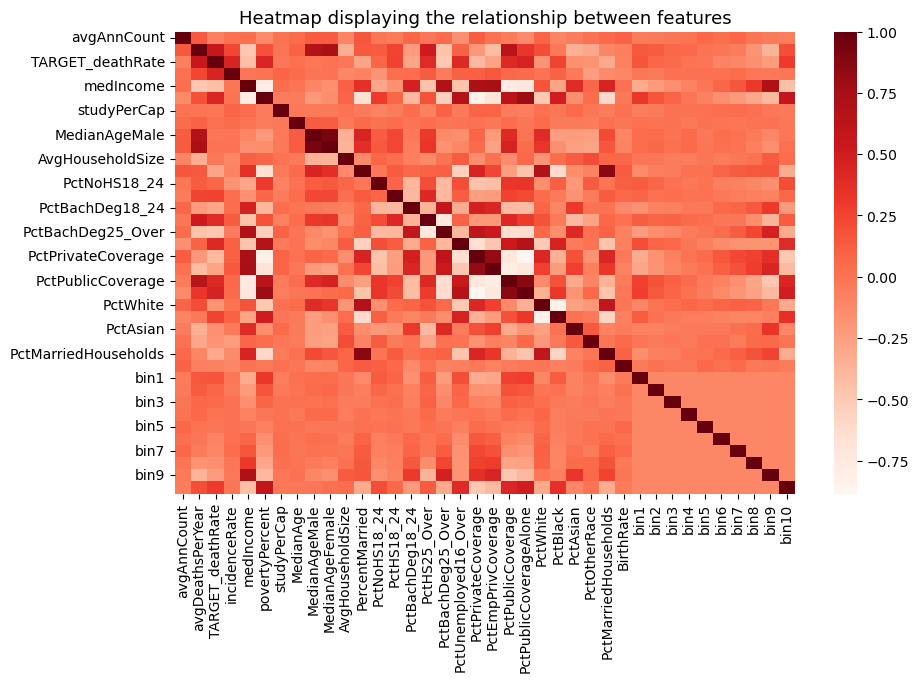

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),cmap=plt.cm.Reds) #,annot=True
plt.title('Heatmap displaying the relationship between features',
         fontsize=13)
plt.show()

The correlation shows groups of features that are correlated among them. The correlation will be take into account in the feature selection on the experiment.

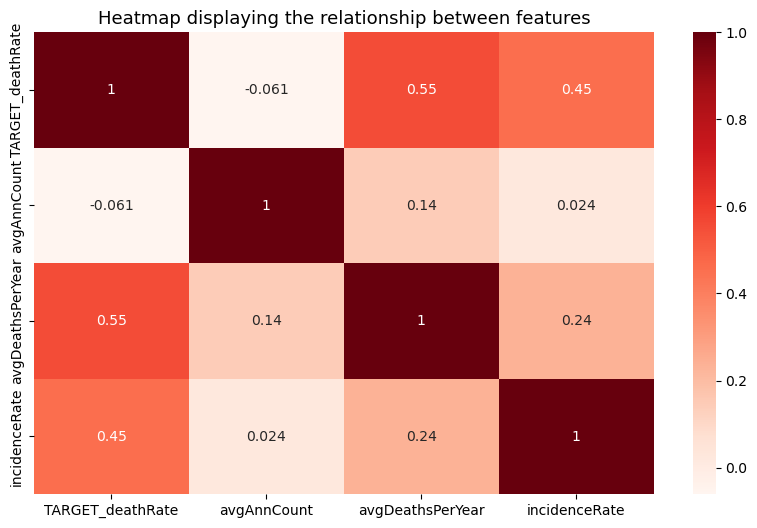

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train[["TARGET_deathRate", "avgAnnCount", "avgDeathsPerYear", "incidenceRate"]].corr(),cmap=plt.cm.Reds, annot=True)
plt.title('Heatmap displaying the relationship between features',
         fontsize=13)
plt.show()

In [35]:
df_to_plot = df_train[['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]

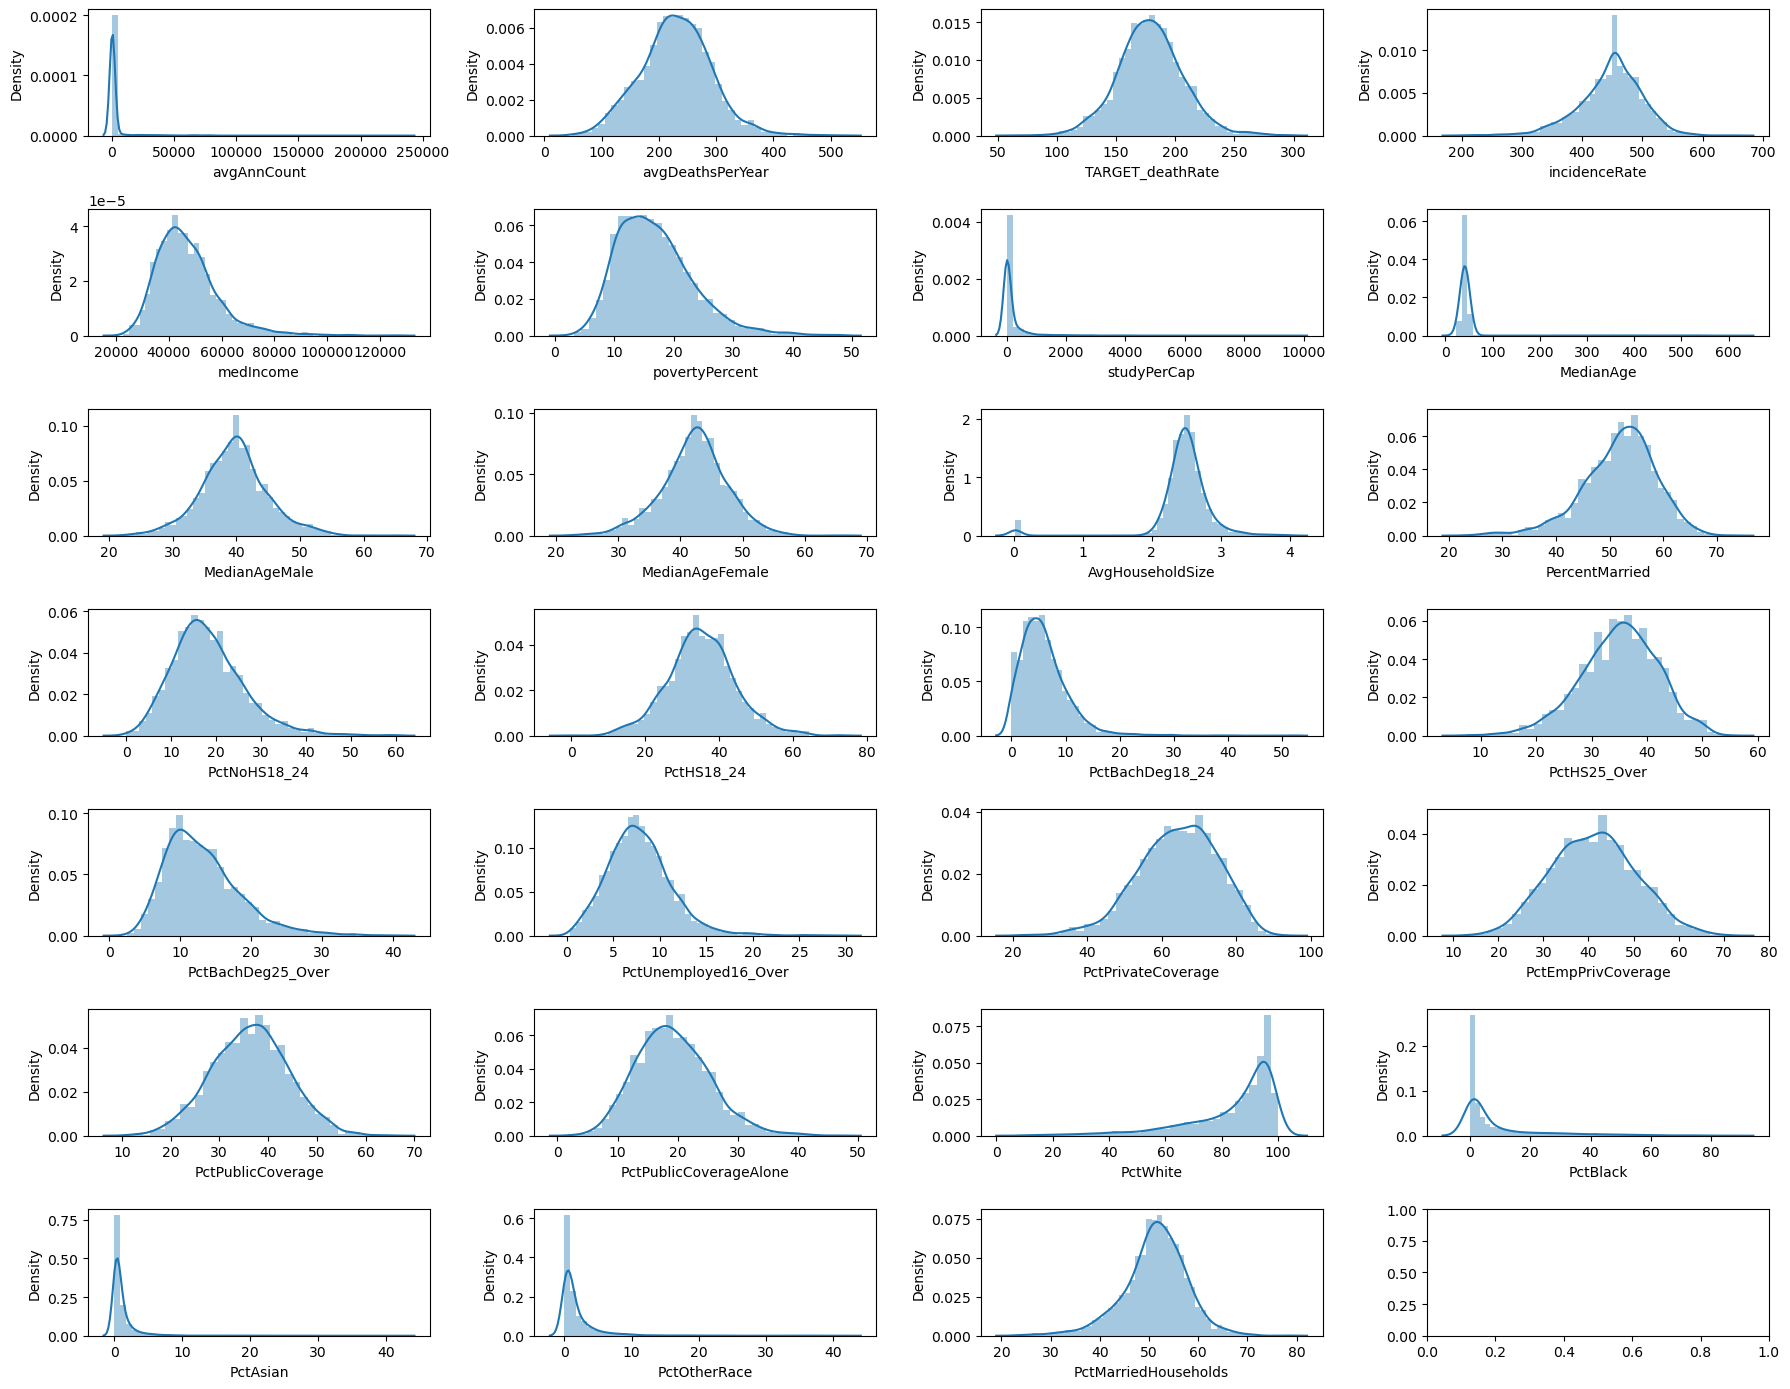

In [36]:
fig, axes = plt.subplots(7, 4, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(df_to_plot.columns[:-1]):
    plot = sns.distplot(df_to_plot[c] ,ax=axes[i])
plt.tight_layout()

Some of the distributions are right or left-skewed. Most of them follow the pattern of a normal distribution.

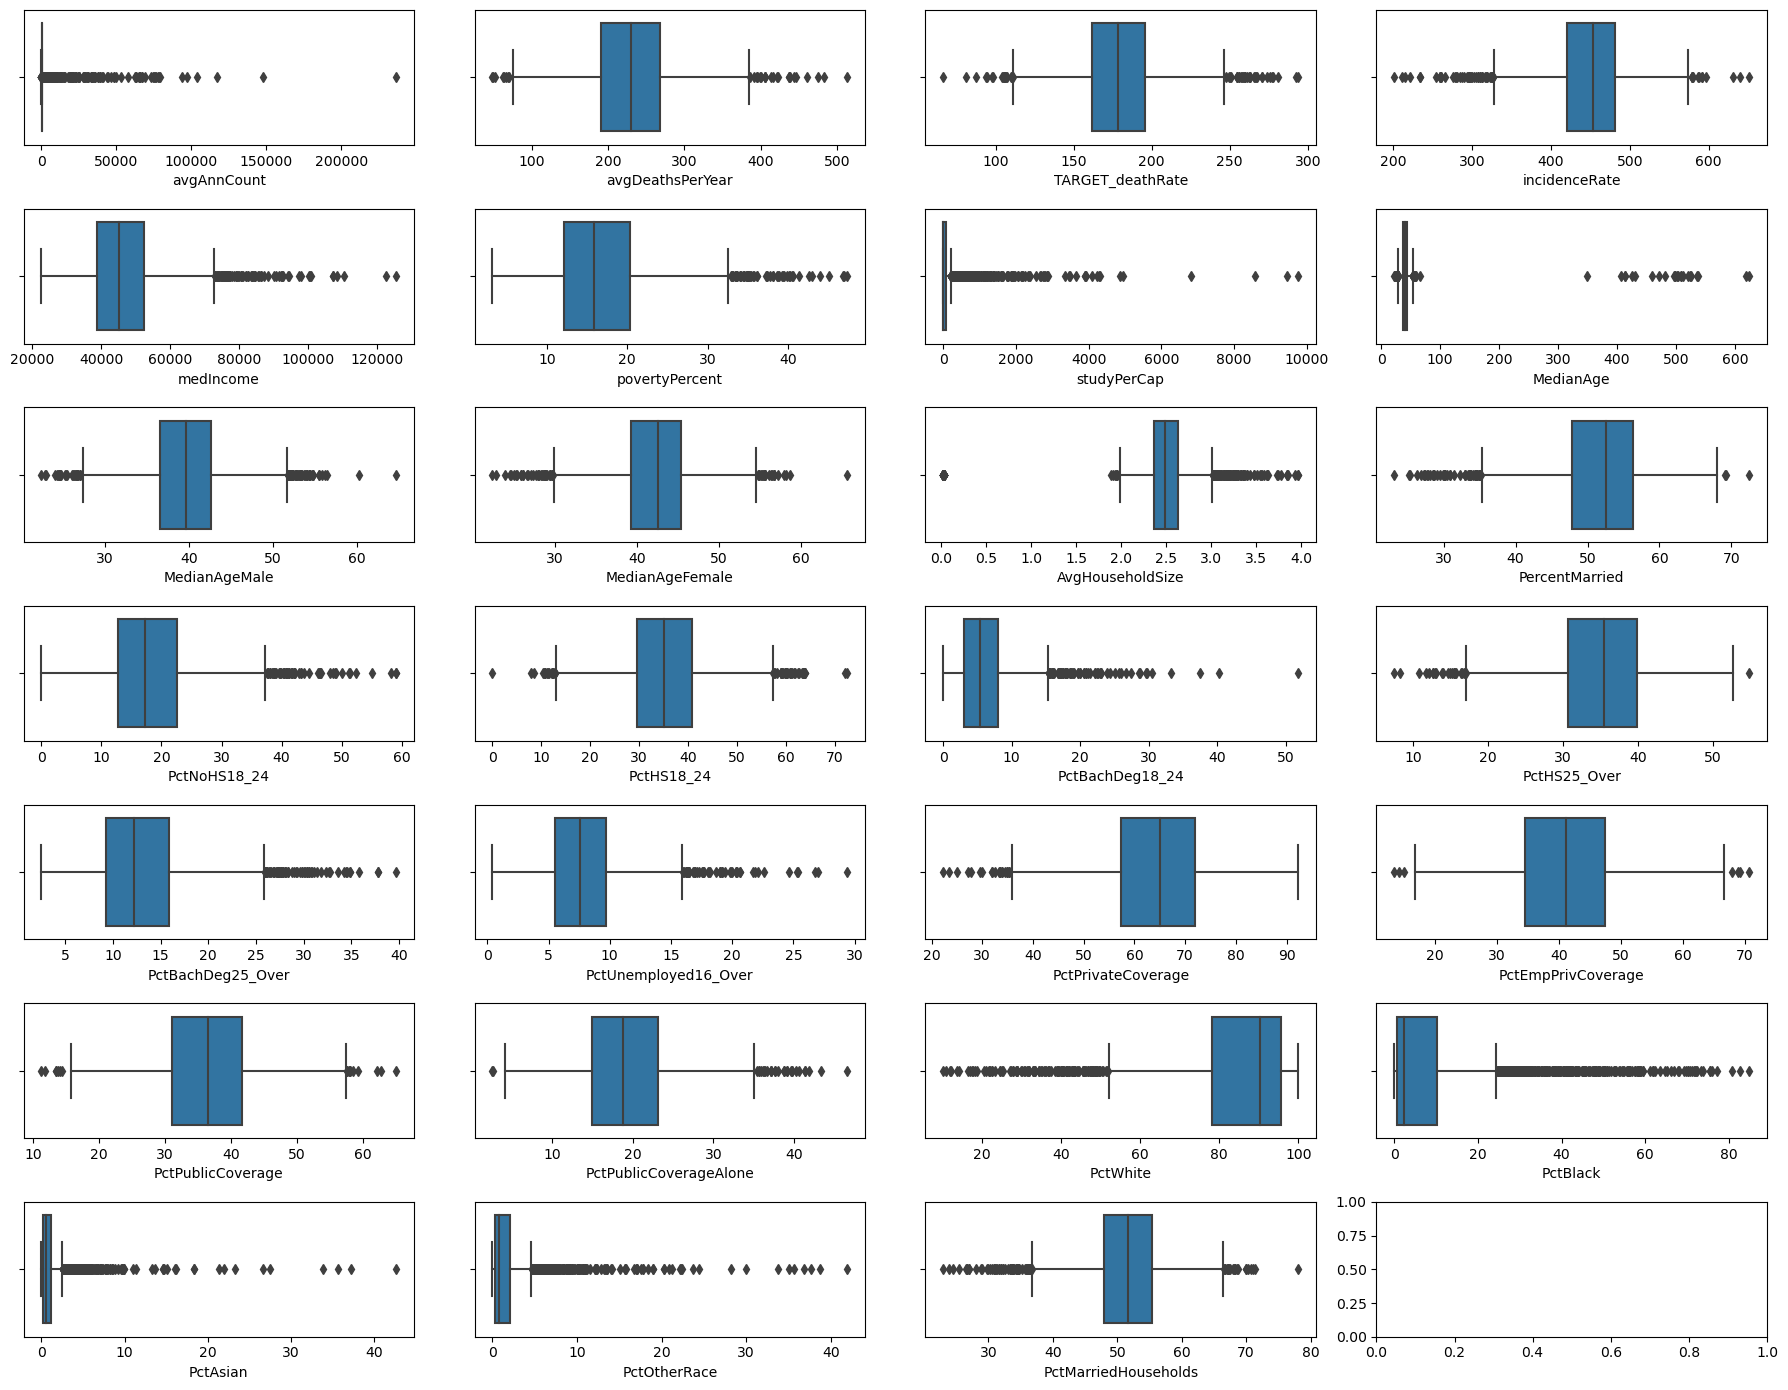

In [37]:
fig, axes = plt.subplots(7, 4, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(df_to_plot.columns[:-1]):
    plot = sns.boxplot(data=df_to_plot, x=c, ax=axes[i])
plt.tight_layout()

## Experiment 1

## Train a multivariate linear regression using all variables, including categorical income feature

### Split the data 

In [38]:
X = df_train.drop(['TARGET_deathRate'], axis=1).values
y = df_train['TARGET_deathRate'].values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Performance

In [40]:
 #average value of the target variable

y_mean = y_train.mean()
y_mean

179.24309449636553

In [41]:
y_base = np.full(y_train.shape, y_mean)

In [42]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [43]:
print(mse(y_train, y_base))
print(mae(y_train, y_base))

769.3903027813093
21.40203726887571


Let's perform the training

In [44]:
from sklearn.linear_model import LinearRegression 

In [45]:
reg1 = LinearRegression()

In [46]:
reg1.fit(X_train, y_train)

LinearRegression()

In [47]:
#model's performance
y_train_preds = reg1.predict(X_train)

In [48]:
# scores on the training set

print(mse(y_train, y_train_preds))
print(mae(y_train, y_train_preds))

151.9637414737588
9.131198011451438


In [49]:
# scores on the validation set

y_valid_preds= reg1.predict(X_valid)
print(mse(y_valid, y_valid_preds))
print(mae(y_valid, y_valid_preds))

174.38141730039877
10.003593098448285


In [50]:
# predictions vs target line charts on the train set
perfect_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test + perfect_test

alt.LayerChart(...)

In [51]:
# predictions versus the target line charts on the validation set
perfect_test = alt.Chart(pd.DataFrame({'target': y_valid, 'preds': y_valid})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_valid, 'preds': y_valid_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test + perfect_test

alt.LayerChart(...)

let's check on the test set

In [52]:
X_test = df_test.drop(['TARGET_deathRate'], axis=1).values
y_test = df_test['TARGET_deathRate'].values

In [53]:
#model's performance on the test set
y_test_preds = reg1.predict(X_test)
print(mse(y_test, y_test_preds))
print(mae(y_test, y_test_preds))

172.88955965505454
9.906285172141107


In [54]:
# predictions versus the target line charts on the test set
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test + perfect_test

alt.LayerChart(...)

The model presents overfitting due to best behaviour (score) on the training data compared to the validation and testing process. However, it is a better model than the baseline. 

Comparing the results from the univariate regression models, we have a better fit of the data on the full-feature model.

In the following exploration, we will discover the features that add value to the regression using feature importance. Then, we will train a model including variables based on a threshold of significance.

### Feature importance

In [55]:
#training a model with all te features
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

X = df_train.drop(['TARGET_deathRate'], axis=1).values
y = df_train['TARGET_deathRate'].values

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_

In [56]:
columns_importance = pd.DataFrame(df_train.drop(['TARGET_deathRate'], axis=1).columns, columns = ['Feature'])

In [57]:
score = []
importance = model.coef_
for i in enumerate(importance):
    score.append(i)
    
score = pd.DataFrame(list(score), columns=["id", 'score'])

In [58]:
feature_importance = pd.concat([score, columns_importance], axis=1)
feature_importance['net_score'] = abs(feature_importance.score)
feature_importance = feature_importance.sort_values(by=["net_score"], ascending=False)
feature_importance.loc[feature_importance['net_score']>=1]


,id,score,Feature,net_score
35,35,4.768053,bin9,4.768053
34,34,2.241765,bin8,2.241765
8,8,-2.123015,MedianAgeFemale,2.123015
19,19,-1.610373,PctPublicCoverage,1.610373
28,28,-1.606677,bin2,1.606677
27,27,-1.488310,bin1,1.488310
20,20,1.471227,PctPublicCoverageAlone,1.471227
32,32,-1.373986,bin6,1.373986
16,16,1.032774,PctUnemployed16_Over,1.032774


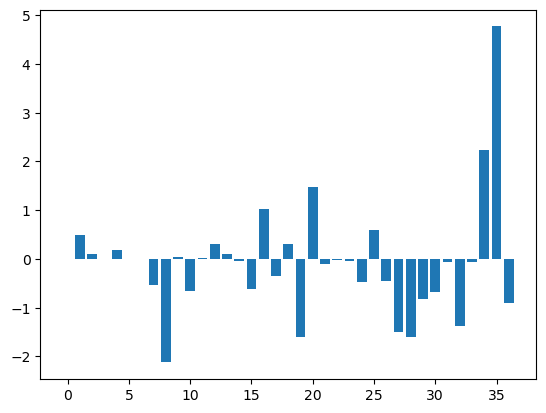

In [59]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Experiment 2

## Train a multivariate linear regression using variables from feature importance

In [60]:
feature_Selection_columns = feature_importance.loc[feature_importance['net_score']>=1]["Feature"]
feature_Selection_columns.values

array(['bin9', 'bin8', 'MedianAgeFemale', 'PctPublicCoverage', 'bin2',
       'bin1', 'PctPublicCoverageAlone', 'bin6', 'PctUnemployed16_Over'],
      dtype=object)

### Split the data 

In [61]:
X_2 = df_train[['bin9', 'bin8', 'MedianAgeFemale', 'PctPublicCoverage', 'bin2',
       'bin1', 'PctPublicCoverageAlone', 'bin6', 'PctUnemployed16_Over']].values
y_2 = df_train['TARGET_deathRate'].values

In [62]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

### Baseline Performance

In [63]:
 #average value of the target variable

y_mean_2 = y_train_2.mean()
y_mean_2

179.24309449636553

In [64]:
y_base_2 = np.full(y_train_2.shape, y_mean_2)

In [65]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [66]:
print(mse(y_train_2, y_base_2))
print(mae(y_train_2, y_base_2))

769.3903027813093
21.40203726887571


let's train the model

In [67]:
reg2 = LinearRegression()

In [68]:
reg2.fit(X_train_2, y_train_2)

LinearRegression()

In [69]:
#model's performance
y_train_preds_2 = reg2.predict(X_train_2)

In [70]:
# scores on the training set

print(mse(y_train_2, y_train_preds_2))
print(mae(y_train_2, y_train_preds_2))

581.9653962711544
18.14061979026885


In [71]:
# scores on the validation set

y_valid_preds_2= reg2.predict(X_valid_2)
print(mse(y_valid_2, y_valid_preds_2))
print(mae(y_valid_2, y_valid_preds_2))

532.1022703978936
17.672026910837968


In [72]:
# predictions vs target line charts on the train set
perfect_test_2 = alt.Chart(pd.DataFrame({'target': y_train_2, 'preds': y_train_2})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_2 = alt.Chart(pd.DataFrame({'target': y_train_2, 'preds': y_train_preds_2})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_2 + perfect_test_2

alt.LayerChart(...)

In [73]:
# predictions versus the target line charts on the validation set
perfect_test_2 = alt.Chart(pd.DataFrame({'target': y_valid_2, 'preds': y_valid_2})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_2 = alt.Chart(pd.DataFrame({'target': y_valid_2, 'preds': y_valid_preds_2})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_2 + perfect_test_2

alt.LayerChart(...)

let's check on the test set

In [74]:
X_test_2 = df_test[['bin9', 'bin8', 'MedianAgeFemale', 'PctPublicCoverage', 'bin2',
       'bin1', 'PctPublicCoverageAlone', 'bin6', 'PctUnemployed16_Over']].values
y_test_2 = df_test['TARGET_deathRate'].values

In [75]:
#model's performance on teh test set
y_test_preds_2 = reg2.predict(X_test_2)
print(mse(y_test_2, y_test_preds_2))
print(mae(y_test_2, y_test_preds_2))

693.8575622421085
18.990913332831976


In [76]:
# predictions versus the target line charts on the test set
perfect_test_2 = alt.Chart(pd.DataFrame({'target': y_test_2, 'preds': y_test_2})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_2 = alt.Chart(pd.DataFrame({'target': y_test_2, 'preds': y_test_preds_2})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_2 + perfect_test_2

alt.LayerChart(...)

The model using variables from feature importance is performing worse than the model with the full data.

# Experiment 3

## Train a multivariate linear regression using all variables with no categorical income feature

In [77]:
#dropping features from the dataset
df_train_noenc = df_train_noenc.drop(['binnedInc'], axis=1)
df_train_noenc = df_train_noenc.drop(['Geography'], axis=1)
df_train_noenc = df_train_noenc.drop(['Id'], axis=1)
df_test_noenc = df_test_noenc.drop(['binnedInc'], axis=1)
df_test_noenc = df_test_noenc.drop(['Geography'], axis=1)
df_test_noenc = df_test_noenc.drop(['Id'], axis=1)

In [78]:
df_train_noenc.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

### Split the data 

In [79]:
X_3 = df_train[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']].values
y_3 = df_train['TARGET_deathRate'].values

In [80]:
X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

### Baseline Performance

In [81]:
 #average value of the target variable

y_mean_3 = y_train_3.mean()
y_mean_3

179.24309449636553

In [82]:
y_base_3 = np.full(y_train_3.shape, y_mean_3)

In [83]:
print(mse(y_train_3, y_base_3))
print(mae(y_train_3, y_base_3))

769.3903027813093
21.40203726887571


let's train the model

In [84]:
reg3 = LinearRegression()

In [85]:
reg3.fit(X_train_3, y_train_3)

LinearRegression()

In [86]:
#model's performance
y_train_preds_3 = reg3.predict(X_train_3)

In [87]:
# scores on the training set

print(mse(y_train_3, y_train_preds_3))
print(mae(y_train_3, y_train_preds_3))

153.54811057108776
9.168099215058621


In [88]:
# scores on the validation set

y_valid_preds_3= reg3.predict(X_valid_3)
print(mse(y_valid_3, y_valid_preds_3))
print(mae(y_valid_3, y_valid_preds_3))

171.7698556419459
9.93511046473058


In [89]:
# predictions vs target line charts on the train set
perfect_test_3 = alt.Chart(pd.DataFrame({'target': y_train_3, 'preds': y_train_3})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_3 = alt.Chart(pd.DataFrame({'target': y_train_3, 'preds': y_train_preds_3})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_3 + perfect_test_3

alt.LayerChart(...)

In [90]:
# predictions versus the target line charts on the validation set
perfect_test_3 = alt.Chart(pd.DataFrame({'target': y_valid_3, 'preds': y_valid_3})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_3 = alt.Chart(pd.DataFrame({'target': y_valid_3, 'preds': y_valid_preds_3})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_3 + perfect_test_3

alt.LayerChart(...)

let's check on the test set

In [91]:
X_test_3 = df_test[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']].values
y_test_3 = df_test['TARGET_deathRate'].values

In [92]:
#model's performance on teh test set
y_test_preds_3 = reg3.predict(X_test_3)
print(mse(y_test_3, y_test_preds_3))
print(mae(y_test_3, y_test_preds_3))

174.06641871855345
9.877841014932054


In [93]:
# predictions versus the target line charts on the test set
perfect_test_3 = alt.Chart(pd.DataFrame({'target': y_test_2, 'preds': y_test_3})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_3 = alt.Chart(pd.DataFrame({'target': y_test_3, 'preds': y_test_preds_3})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_3 + perfect_test_3

alt.LayerChart(...)

If we compare the results for the full model and the full model without categorical income variables, we can conclude that the categorical income variable doesn't add value to the final score.

Finally, we will perform a feature selection based on correlation.

## Feature selection

### pearson's correlation feature selection

Feature selection is performed using Pearson’s Correlation Coefficient with the function f_regression.

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_train = df_train.drop(['TARGET_deathRate'], axis=1).values
y_train = df_train['TARGET_deathRate'].values

features_df = df_train.drop(['TARGET_deathRate'], axis=1)

# define feature selection
fs = SelectKBest(score_func=f_regression, k=20)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(2408, 20)


In [95]:
cols_idxs = fs.get_support(indices=True)
features_df_new = features_df.iloc[:,cols_idxs]

In [96]:
features_df_new

,avgDeathsPerYear,incidenceRate,medIncome,povertyPercent,PercentMarried,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctOtherRace,PctMarriedHouseholds,bin9,bin10
0,299.580587,561.400000,29090,26.8,59.2,32.5,3.5,43.4,4.3,12.3,44.8,32.0,47.5,32.9,99.693045,0.044920,0.000000,55.499459,0,1
1,159.795462,345.600000,29782,38.8,44.3,49.0,0.5,35.5,6.4,11.5,27.2,18.8,45.3,34.1,94.791383,1.649850,2.854286,52.818296,0,1
2,253.138716,468.400000,41955,15.5,48.2,38.3,6.4,43.5,10.2,10.6,67.4,44.9,34.5,16.0,95.102348,1.741749,0.445611,50.560800,0,0
3,232.790156,453.549422,55378,11.1,54.2,51.0,6.2,32.5,10.6,5.8,70.9,49.6,30.1,15.2,85.833870,0.933677,7.244044,52.565181,0,0
4,233.890773,349.700000,26309,35.3,30.2,35.4,4.0,40.6,5.9,14.6,54.8,30.4,45.1,24.5,24.535525,73.223736,1.396239,33.641208,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,188.704191,456.600000,65485,7.7,57.4,35.0,7.7,30.5,18.4,5.2,75.7,55.1,24.2,11.3,91.187608,4.445537,0.858126,60.095060,1,0
2434,253.126217,492.400000,42477,16.9,53.7,38.4,5.0,39.5,8.5,6.7,65.9,46.2,34.9,18.8,90.130702,5.943936,0.485833,51.648588,0,0
2435,230.756552,506.700000,40339,21.3,45.3,27.4,0.8,37.9,11.4,15.6,58.4,34.4,36.9,20.6,65.463178,30.550955,0.104891,49.758980,0,0
2436,259.710930,453.549422,39764,16.7,53.2,34.4,9.0,36.8,9.9,6.5,60.1,37.3,40.0,21.3,94.625317,0.154508,0.684251,49.880605,0,0


## Experiment 4

## Train a multivariate linear regression using variables based on correlation

### Split the data 

In [97]:
features_df_new.columns

Index(['avgDeathsPerYear', 'incidenceRate', 'medIncome', 'povertyPercent',
       'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctOtherRace', 'PctMarriedHouseholds', 'bin9',
       'bin10'],
      dtype='object')

In [98]:
X_4 = df_train[['avgDeathsPerYear', 'incidenceRate', 'medIncome', 'povertyPercent',
       'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctOtherRace', 'PctMarriedHouseholds', 'bin9',
       'bin10']].values
y_4 = df_train['TARGET_deathRate'].values

In [99]:
X_train_4, X_valid_4, y_train_4, y_valid_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

### Baseline Performance

In [100]:
 #average value of the target variable

y_mean_4 = y_train_4.mean()
y_mean_4

179.24309449636553

In [101]:
y_base_4 = np.full(y_train_4.shape, y_mean_4)

In [102]:
print(mse(y_train_4, y_base_4))
print(mae(y_train_4, y_base_4))

769.3903027813093
21.40203726887571


let's train the model

In [103]:
reg4 = LinearRegression()

In [104]:
reg4.fit(X_train_4, y_train_4)

LinearRegression()

In [105]:
#model's performance
y_train_preds_4 = reg4.predict(X_train_4)

In [106]:
# scores on the training set

print(mse(y_train_4, y_train_preds_4))
print(mae(y_train_4, y_train_preds_4))

191.76174043677972
10.428554053103069


In [107]:
# scores on the validation set

y_valid_preds_4= reg4.predict(X_valid_4)
print(mse(y_valid_4, y_valid_preds_4))
print(mae(y_valid_4, y_valid_preds_4))

199.9292155759265
11.003889743452637


In [108]:
# predictions vs target line charts on the train set
perfect_test_4 = alt.Chart(pd.DataFrame({'target': y_train_4, 'preds': y_train_4})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_4 = alt.Chart(pd.DataFrame({'target': y_train_4, 'preds': y_train_preds_4})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_4 + perfect_test_4

alt.LayerChart(...)

In [109]:
# predictions versus the target line charts on the validation set
perfect_test_4 = alt.Chart(pd.DataFrame({'target': y_valid_4, 'preds': y_valid_4})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_4 = alt.Chart(pd.DataFrame({'target': y_valid_4, 'preds': y_valid_preds_4})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_4 + perfect_test_4

alt.LayerChart(...)

let's check on the test set

In [112]:
X_test_4 = df_test[['avgDeathsPerYear', 'incidenceRate', 'medIncome', 'povertyPercent',
       'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctOtherRace', 'PctMarriedHouseholds', 'bin9',
       'bin10']].values
y_test_4 = df_test['TARGET_deathRate'].values

In [113]:
#model's performance on teh test set
y_test_preds_4 = reg4.predict(X_test_4)
print(mse(y_test_4, y_test_preds_4))
print(mae(y_test_4, y_test_preds_4))

226.6132589525116
11.277242313679258


In [114]:
# predictions versus the target line charts on the test set
perfect_test_4 = alt.Chart(pd.DataFrame({'target': y_test_4, 'preds': y_test_4})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test_4 = alt.Chart(pd.DataFrame({'target': y_test_4, 'preds': y_test_preds_4})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test_4 + perfect_test_4

alt.LayerChart(...)

Features selection based on correlations is not improving the model compared to the model with the full dataset. Moreover, it presents overfitting.

# Conclusion

After several experiments, the model with the best score includes all the features and doesn't consider the categorical income variable (experiment 3). However, this model presents a slight degree of overfitting, and the change of making predictions based on random fluctuations can increase in the model. The described model issue will be addressed in section C of the study.

A clear tendency to improve prediction is presented when the model includes all the available data. Knowing that there is autocorrelation among some variables and that the model shows a slight degree of overfitting, we can encounter a complex model with inaccurate data and/or a model that needs more features to better capture the patterns behind the mean per capita (100,000) cancer mortalities.